# Phase 1: Data gathering
Here we load the data. It comes from a lego data set from kaggle. https://www.kaggle.com/datasets/rtatman/lego-database

This is a topic I've been interested in since I was a child and now that I have a son we're both enjoying it. 
I felt that lego sets have changed since I was a child. I was interested to see how they had changed. Were the pieces smaller? Were there more sets to choose from? What colours were used now compared to the past. Were there more colours used? And how big were sets then compared to now? Are there more themed sets now? 
Once I started to look I found the Lego data set on Kaggle. It looked like a nice complete data set. It was well broken down and laid out nice. Kaggle is excellent because you can see the reviews and comments people made on the dataset. This data set is actually originally from rebrickable.com. There is a newer dataset there but I thought it better to go with one that was tried and tested. 

Now, lets get to work. First we'll need to import all the data using Pandas. I chose pandas for use with dataframes, seaborn to allow easier visualisations and numpy because it allows faster and more compact arrays than python lists. 



In [334]:
#Pandas for data frames
import pandas as pd
#Seaborn allows easier visualisations
import seaborn as sb
# NumPy arrays are faster and more compact than Python lists.
import numpy as np
#For visualisations
import matplotlib.pyplot as plt





Libraries are loaded. Now lets load the data. 
This is an ERD of the data:
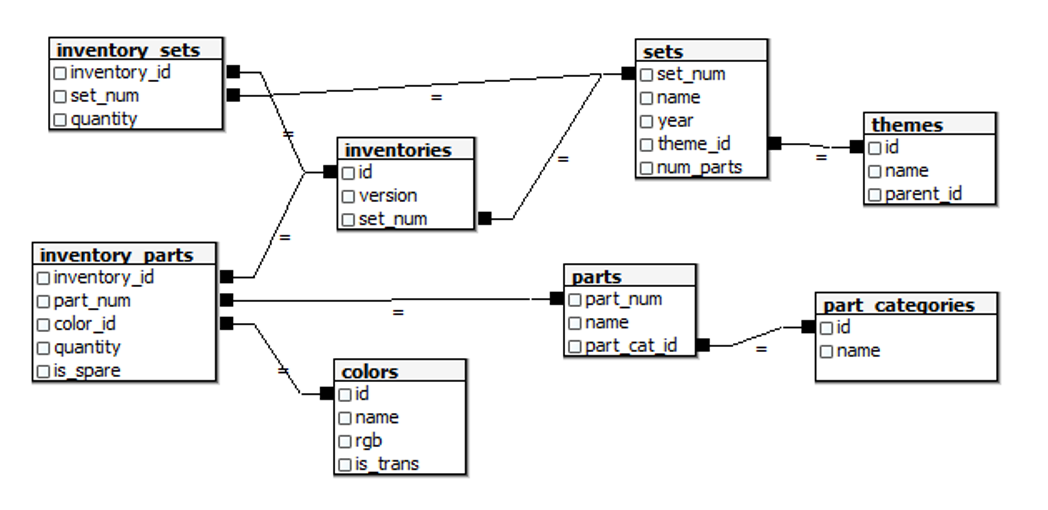


# 2. Importing

In [335]:
#This is a list of all the colours
colors = pd.read_csv("legodata/colors.csv")
#Inventories, when a set got an update there were different versions of the inventories. 
inv = pd.read_csv("legodata/inventories.csv")
#Inventory is the bag of lego that comes inside the box. Sometimes there are 3 or 4 bags
inv_parts = pd.read_csv("legodata/inventory_parts.csv")
#This links the inventory bags to the sets
inv_sets = pd.read_csv("legodata/inventory_sets.csv")
#Individual parts, actual Lego pieces
parts = pd.read_csv("legodata/parts.csv")
#types of each part e.g. plate or brick or man
part_cats = pd.read_csv("legodata/part_categories.csv")
#this is the sets that are actually sold in shops.
sets = pd.read_csv("legodata/sets.csv")
#These are the different themes of Lego e.g. Ninjago, Harry Potter, City
themes = pd.read_csv("legodata/themes.csv")

We can quickly have a look at a few rows from all the data and get a fee.

In [336]:
#You can use the .head function to view the first few rows of the data. It can help to get a feel for the data.
print(colors.head)
print(inv.head)
print(inv_parts.head)
print(inv_sets.head)
print(parts.head)
print(part_cats.head)
print(sets.head)
print(themes.head)


<bound method NDFrame.head of        id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]>
<bound method NDFrame.head of           id  version    set_num
0         35        1  5004559-1
1         36        1     1756-1
2         37        1     8931-1
3         38        1     9385-1
4         39        1    66512-1
...      ...      ...        ...


The data looks great. Super well formed and linked together nicely with a correctly functioning primary and foreign key system. 
We can find out the dimensions of each set of data that we have. 

In [337]:
print("Colors shape:", colors.shape)
print("Inventories shape: ", inv.shape)
print("Inventory Parts shape:", inv_parts.shape)
print("Inventory Sets shape:", inv_sets.shape)
print("Parts shape:", parts.shape)
print("Part Categories shape:", part_cats.shape)
print("Sets shape:", sets.shape)
print("Themes shape:", themes.shape)

Colors shape: (135, 4)
Inventories shape:  (11662, 3)
Inventory Parts shape: (580251, 5)
Inventory Sets shape: (2846, 3)
Parts shape: (25993, 3)
Part Categories shape: (57, 2)
Sets shape: (11673, 5)
Themes shape: (614, 3)


Have a look at some of the data from colours.

In [338]:
colors.describe(include='all')

,id,name,rgb,is_trans
count,135.000000,135,135,135
unique,NaN,135,124,2
top,NaN,Lavender,000000,f
freq,NaN,1,3,107
mean,253.037037,NaN,NaN,NaN
std,878.441466,NaN,NaN,NaN
min,-1.000000,NaN,NaN,NaN
25%,34.500000,NaN,NaN,NaN
50%,85.000000,NaN,NaN,NaN
75%,231.000000,NaN,NaN,NaN


Looking at this we can see our main dataset is probably going to be Inventory Parts (inv_parts). Which makes sense, it's a dataset that contains what part belongs in which inventory. 
An inventory is the bag that comes in a box of Lego. Sometimes there's more than one bag(inventory) in a box(set).
One non obvious column is parent_ID in themes. This is infact the parent ID of that theme. Which is self referenceing. So forinstnace, you could have a "Space" theme, ID 126, but "Ice Planet 2002" ID 133 is also a theme, but it's parent theme is "Space".

Next we look at the datatypes used. 

In [339]:
print("Colors datatypes:", colors.dtypes)
print("Inventories datatypes: ", inv.dtypes)
print("Inventory Parts datatypes:", inv_parts.dtypes)
print("Inventory Sets datatypes:", inv_sets.dtypes)
print("Parts datatypes:", parts.dtypes)
print("Part Categories datatypes:", part_cats.dtypes)
print("Sets datatypes:", sets.dtypes)
print("Themes datatypes:", themes.dtypes)

Colors datatypes: id           int64
name        object
rgb         object
is_trans    object
dtype: object
Inventories datatypes:  id          int64
version     int64
set_num    object
dtype: object
Inventory Parts datatypes: inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
dtype: object
Inventory Sets datatypes: inventory_id     int64
set_num         object
quantity         int64
dtype: object
Parts datatypes: part_num       object
name           object
part_cat_id     int64
dtype: object
Part Categories datatypes: id       int64
name    object
dtype: object
Sets datatypes: set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object
Themes datatypes: id             int64
name          object
parent_id    float64
dtype: object


The data looks pretty straightforward. it's mostly integers, with the occasional float and then objects as text. 

## Observations
Next we'll do a few observations on the data. To do this we'll need to join a few of the dataframes together. 


In [340]:
print("Colors datatypes:", colors.dtypes)
print("Inventory Parts datatypes:", inv_parts.dtypes)

Colors datatypes: id           int64
name        object
rgb         object
is_trans    object
dtype: object
Inventory Parts datatypes: inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
dtype: object


What if we want to see what sets years had the most sets

In [341]:
sets_by_year = sets.groupby('year').count()

What if we want to see how many sets were released, we'd need to group by year. 
Here I've created a new field, added it to a new dataframe i created just to keep things simple.

In [349]:
setsWithTotals = sets.copy(deep=True)
setsWithTotals['setsReleasedPerYear'] = setsWithTotals.groupby('year')['year'].transform('count')
print(setsWithTotals.head)

<bound method NDFrame.head of              set_num                                               name  year  \
0               00-1                                    Weetabix Castle  1970   
1             0011-2                                  Town Mini-Figures  1978   
2             0011-3                         Castle 2 for 1 Bonus Offer  1987   
3             0012-1                                 Space Mini-Figures  1979   
4             0013-1                                 Space Mini-Figures  1979   
...              ...                                                ...   ...   
11668    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...  2012   
11669   WHITEHOUSE-1                                  Micro White House  2015   
11670    Wiesbaden-1  LEGO Store Grand Opening Exclusive Set, Wiesba...  2010   
11671  WishingWell-1                     Wishing Well [Toys R Us Promo]  2013   
11672        wwgp1-1                Wild West Limited Edition Gift Pack  1996  

In [353]:
setsWithTotals.sort_values('setsReleasedPerYear', ascending=False)

,set_num,name,year,theme_id,num_parts,setsReleasedPerYear
4685,5002914-1,THE LEGO® MOVIE™ Emmet Key Light,2014,503,0,713
3778,42030-1,Remote-Controlled Volvo L350F Wheel Loader,2014,7,1634,713
7003,70133-1,Spinlyn's Cavern,2014,571,406,713
7002,70132-1,Scorm's Scorpion Stinger,2014,571,433,713
7001,70131-1,Rogon's Rock Flinger,2014,571,256,713
...,...,...,...,...,...,...
6955,700.B-1,Early LEGO Windows/Doors (without Glass),1953,371,12,4
6967,700.F-1,Automatic Binding Bricks - Small Brick Set (Le...,1953,371,48,4
1672,238-1,Lego System Idea Book no. 1,1960,497,0,3
6973,700K-1,Kindergarten LEGO Set,1960,513,476,3


It's kind of hard to make out that. Maybe a graph would make it clearer?

In [ ]:
ax = plt.subplots(1,1,figsize=(25, 8))
sb.countplot(x = sets['year'],)
plt.xticks(rotation=90)
plt.title('Number of Lego Sets released per year')
plt.show()

As you can see there was a clear increase in the number of sets being released each year. They seemed to have tapered off in 2015, 2016. 
This data set is from 2017, we don't know when, but it's possible it was mid year. 
So 2017 can be ignored.

In [ ]:
#Check datatype as we're getting errors on the merge
print(inv_parts.color_id.dtype)
print(colors.id.dtype)

I added an ID column to inv_parts and inv_sets.
The tables have a composite key which would make them difficult to deal with later. 

In [ ]:
colors.set_index("id")
inv.set_index("id")
inv_parts["id"] = inv_parts.index + 1
inv_parts.set_index("id")
inv_sets["id"] = inv_sets.index + 1
inv_sets.set_index("id")
parts.set_index("part_num")
part_cats.set_index("id")
#sets.set_index("set_num") this doesn't seem to work for some reason.
themes.set_index("id")


# 3. Preparation

## Merging
We'll add Suffixes for good practice. it's only added when two columns are the same. There are a few different ways to merge, but i went with this option because it gave me more control over what i was doing and made it easier to see what was happening. There are 

In [ ]:
alldf = pd.merge(colors, inv_parts, left_on='id', right_on='color_id', validate='1:m', suffixes=('_colors','_inv_parts'))

In [ ]:
print(alldf.shape)

In [ ]:
#print(tabulate(sets, headers='firstrow', tablefmt='fancy_grid')) come back to this
print(alldf.head)


In [ ]:
alldf = pd.merge(alldf, parts, left_on='part_num', right_on='part_num', suffixes=('_all','_parts'))

In [ ]:
print(alldf.head)

In [ ]:
alldf = pd.merge(alldf, part_cats, left_on='part_cat_id', right_on='id', suffixes=('_all', '_part_cats'))

In [ ]:
alldf = pd.merge(alldf, inv, left_on = 'inventory_id', right_on='id', suffixes=('_all', '_inv'))

In [ ]:
alldf = pd.merge(alldf, sets, left_on = 'set_num', right_on='set_num', suffixes=('_all', '_set_num'))

In [ ]:
alldf = pd.merge(alldf, themes, left_on = 'theme_id', right_on='id', suffixes=('_all', '_themes'))


## Inventory_sets issue
I needed to merge on multiple keys here because Inventory Sets had two foreign keys and merging on just one created incorrect multiple joins. 
Having serious issues joining the inventory sets. I'm not sure what this table does. But we've got the link between sets and inventories anyway, so we may not need it. There seems to be a quantity figure. 
On Kaggle there was a discussion about Inventory_Sets and there seems to be a bit of confusion. From what i can see, i should be able to work around not being able to load it. 

In [ ]:
#Tried with multiple keys
#alldf = pd.merge(alldf, inv_sets, left_on = ['id_inv', 'set_num'], right_on=['inventory_id', 'set_num'], 
#                 suffixes=('_all', '_inv_sets'))
#Tried with single keys
#alldf = pd.merge(alldf, inv_sets, left_on = 'id_inv', right_on='inventory_id', 
#                 suffixes=('_all', '_inv_sets'))


I exported the data to have a look at it in one place and give it a visual once over. 

In [ ]:
alldf.to_csv('all.csv')

We can see here with the .head function that everything looks good also. It's a big dataset. 
So maybe we'll splice and group it later. 

In [ ]:
print(alldf.head)


In [ ]:
# Plot histogram grid of the numeric features, with figure size of 15 by 15, and the x-axis lables rotated 45 degrees clockwise.
alldf.hist(figsize=(15,15), xrot=-45)

# Clear the text "residue"
plt.show()

## Data cleaning
The data quality was excellent with I couldn't find any issues with the data. 
Orphan records, blank spaces, invalid values. The data was excellent. 
If you did have a case where you had to resolve issues with data. You have a few different options. 


# Unused code due to not needed

## Retreive data from MySQL
My data originated from CSV files. I may have created a SQL database and read from there into the dataframes.
That would have been slightly different loading the data. 
It may have looked like this: 

In [ ]:
#import mysql.connector

#mydb = mysql.connector.connect(
#  host="localhost",
#  user="yourusername",
#  password="yourpassword",
#  database="lego"
#)

#mycursor = mydb.cursor()

#mycursor.execute("SELECT id, name, rgb, is_trans FROM colors")

#myresult = mycursor.fetchall()

#for x in myresult:
#  print(x)

## Drop Dubpicates
I didn't have an opportunity to drop duplicates but if i did have a requirement.
If for instance, the color table had dupe RGB values in it and i wanted to drop the dupes, it might have looked like this. 


In [ ]:
#commented out to avoid running
#colors.drop_duplicates(subset=['rgb'])



## Replace Missing Values
The dataset that I had was complete, with no unfilled values. 
But, if i did have to replace missing values i would have used the dataframe.fillna method. 
We have some rgb values as 0 in the colours dataframe. If for example they were NaN instead.
We'd use this code to replace the data with 0s.



In [ ]:
#print(colors.fillna(0))